In [1]:
# Date: 03/20/18
# Author: Anthony ma

import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from lifelines import *
from lifelines.statistics import logrank_test

In [2]:
def process_data(input):
    """
    Basic statistical profiling 
    
    Parameters
    ----------
    input: string
        Input data file path 
        
    """
    df = pd.read_csv(input, delimiter="\t")
    return df


def var_dist(df, var, df_var_name, plot_title):
    """
    Extract statistics and plot distribution of race 
    
    Parameters
    ----------
    df: pandas data frame 
        Dataframe object to profile
    var: string
        User defined variable name 
    
    df_var_name: string
        Column header name as specified in the raw data
    plot_title: string
        Title to name the plot 
    """
    
    # plot race distribution
    df_var = df[df_var_name]
    var_count = df_var.value_counts()
    var_count_dict = var_count.to_dict()
    var_count.plot(kind='bar', color='Black', title=plot_title)
    
    # calculate race distribution
    print("\n%s distribution" % (var))
    n = sum(var_count_dict.values())
    for k, v in var_count_dict.iteritems():
        percentage_dist = round(100*float(v)/n, 1)
        print "%s, %s (%s)" % (k, percentage_dist, v)
    

In [4]:
medulloblastoma_data = "/Users/anthony/Desktop/sherlock/SEER/data/medulloblastoma/v1/medulloblastoma_v1.tsv"

In [5]:
### Medulloblastoma analysis
# n = 857 patients with survival outcome data

cdf = process_data(medulloblastoma_data)
cdf = cdf.loc[cdf['Survival months'] != 'Unknown']
cdf.head(200)

,Age at diagnosis,Sex,"Race recode (W, B, AI, API)",Year of diagnosis,Primary Site,Site specific surgery (1973-1997 varying detail by year and site),Site recode ICD-O-3/WHO 2008,Behavior recode for analysis,Primary Site - labeled,Histologic Type ICD-O-3,...,Radiation sequence with surgery,"Chemotherapy recode (yes, no/unk)",COD to site recode,SEER cause-specific death classification,Survival months,Reason no cancer-directed surgery,Vital status recode (study cutoff used),Total number of in situ/malignant tumors for patient,Total number of benign/borderline tumors for patient,Insurance Recode (2007+)
0,31,Male,White,1974,716,90,Brain,Malignant,"C71.6-Cerebellum, NOS",9470,...,Radiation after surgery,No/Unknown,State DC not available or state DC available b...,Alive or dead of other cause,0019,Surgery performed,Dead,1,0,Blank(s)
1,40,Female,White,1979,716,90,Brain,Malignant,"C71.6-Cerebellum, NOS",9471,...,Radiation after surgery,No/Unknown,Accidents and Adverse Effects,Alive or dead of other cause,0297,Surgery performed,Dead,1,0,Blank(s)
2,25,Female,Black,1978,716,09,Brain,Malignant,"C71.6-Cerebellum, NOS",9470,...,No radiation and/or cancer-directed surgery,No/Unknown,Brain and Other Nervous System,Dead (attributable to this cancer dx),0432,"Recommended but not performed, unknown reason",Dead,1,0,Blank(s)
3,35,Male,Black,1980,716,09,Brain,Malignant,"C71.6-Cerebellum, NOS",9470,...,No radiation and/or cancer-directed surgery,No/Unknown,Brain and Other Nervous System,Dead (attributable to this cancer dx),0004,"Recommended but not performed, unknown reason",Dead,1,0,Blank(s)
4,50,Male,Asian or Pacific Islander,1984,716,90,Brain,Malignant,"C71.6-Cerebellum, NOS",9470,...,Radiation after surgery,No/Unknown,Brain and Other Nervous System,N/A not first tumor,0016,Surgery performed,Dead,2,0,Blank(s)
5,33,Female,White,1980,716,90,Brain,Malignant,"C71.6-Cerebellum, NOS",9470,...,Radiation after surgery,Yes,Brain and Other Nervous System,Dead (attributable to this cancer dx),0013,Surgery performed,Dead,1,0,Blank(s)
6,21,Male,Black,1978,716,90,Brain,Malignant,"C71.6-Cerebellum, NOS",9470,...,No radiation and/or cancer-directed surgery,No/Unknown,Brain and Other Nervous System,Dead (attributable to this cancer dx),0001,Surgery performed,Dead,1,0,Blank(s)
7,29,Female,White,1975,716,90,Brain,Malignant,"C71.6-Cerebellum, NOS",9470,...,Radiation after surgery,No/Unknown,Breast,Alive or dead of other cause,0162,Surgery performed,Dead,2,0,Blank(s)
8,23,Male,White,1974,716,09,Brain,Malignant,"C71.6-Cerebellum, NOS",9470,...,No radiation and/or cancer-directed surgery,No/Unknown,Brain and Other Nervous System,Dead (attributable to this cancer dx),0050,"Recommended but not performed, unknown reason",Dead,1,0,Blank(s)
9,86,Female,Asian or Pacific Islander,1976,716,90,Brain,Malignant,"C71.6-Cerebellum, NOS",9470,...,Radiation after surgery,No/Unknown,Pneumonia and Influenza,Alive or dead of other cause,0008,Surgery performed,Dead,1,0,Blank(s)



Sex distribution
Male, 58.5 (501)
Female, 41.5 (356)


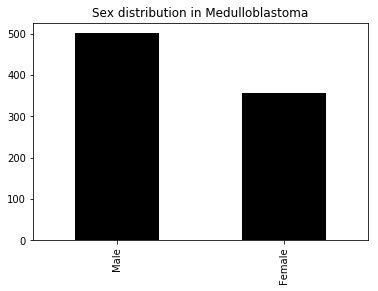

In [6]:
### Gender distribution
var = "Sex"
title = "%s distribution in Medulloblastoma" %(var)
var_dist(cdf, var, "Sex", title)

Median age: 31.0 STD: 11.1893846976


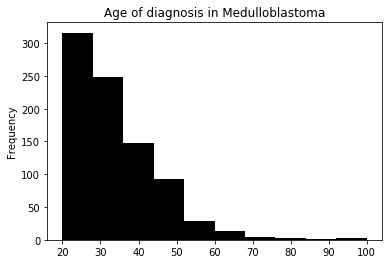

In [7]:
### Distribution of age at diagnosis
cdf_age = cdf['Age at diagnosis']
cdf_age.plot(kind="hist", color='Black', title="Age of diagnosis in Medulloblastoma")
median_age = np.median(cdf_age)
std_age = np.std(cdf_age)
print("Median age: %s STD: %s" % (median_age, std_age))

In [8]:
age_bound_dict = {}
n= 857
for x in range (20, 100, 5):
    age_bound_dict[(x, x+4)] = 0

for i in cdf_age:
    for bound in age_bound_dict.keys():
        lb, hb = bound
        if(i >=lb and i <= hb):
            age_bound_dict[bound]+=1

for bound in sorted(age_bound_dict.keys()):
    tot = age_bound_dict[bound]
    freq = round(100*age_bound_dict[bound]/float(n),1)
    age_bound_dict[bound] = freq
    lb, hb = bound
    print("    %s-%s years     %s (%s)" % (lb, hb, freq, tot))
    
age_bound_dict

    20-24 years     24.0 (206)
    25-29 years     20.9 (179)
    30-34 years     18.1 (155)
    35-39 years     13.8 (118)
    40-44 years     7.6 (65)
    45-49 years     6.5 (56)
    50-54 years     4.8 (41)
    55-59 years     1.5 (13)
    60-64 years     1.2 (10)
    65-69 years     0.5 (4)
    70-74 years     0.5 (4)
    75-79 years     0.2 (2)
    80-84 years     0.1 (1)
    85-89 years     0.1 (1)
    90-94 years     0.0 (0)
    95-99 years     0.1 (1)


{(20, 24): 24.0,
 (25, 29): 20.9,
 (30, 34): 18.1,
 (35, 39): 13.8,
 (40, 44): 7.6,
 (45, 49): 6.5,
 (50, 54): 4.8,
 (55, 59): 1.5,
 (60, 64): 1.2,
 (65, 69): 0.5,
 (70, 74): 0.5,
 (75, 79): 0.2,
 (80, 84): 0.1,
 (85, 89): 0.1,
 (90, 94): 0.0,
 (95, 99): 0.1}

In [9]:
# ### Age distribution 

# # Plot age distribution
# cdf_age = cdf['Age recode with <1 year olds']
# age_count = cdf_age.value_counts().sort_index()
# age_count.plot(kind='bar', color='Black', title="Age distribution in Medulloblastoma")

# # Calculate age distribution
# print ("\nAge distribution")
# age_count_dict = age_count.to_dict()
# n = sum(age_count_dict.values())
# for k, v in age_count_dict.iteritems():
#     percentage_dist = round(100*float(v)/n, 1)
#     print "%s, %s (%s)" % (k, percentage_dist, v)
    
# # Calculate mean age
# age_list = []
# age_count = 0
# for age in cdf_age:
#     age_range = map(int, age.strip().split(" ")[0].split("-"))
#     avg_age_point = float(age_range[0] + age_range[1])/2
#     age_count += avg_age_point 
#     age_list.append(avg_age_point)
# mean_age = round(age_count/n, 1)
# print ("\nMean Age: %s" %(mean_age))

# # Calculate median age 
# median_age = np.median(np.array(age_list))
# print("\nMedian Age: %s" % (median_age))



Racial distribution
Asian or Pacific Islander, 5.4 (46)
White, 86.5 (741)
Black, 7.1 (61)
Unknown, 0.5 (4)
American Indian/Alaska Native, 0.6 (5)


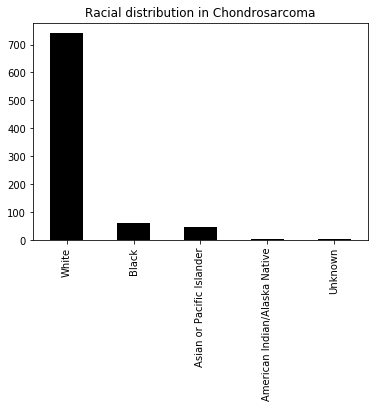

In [10]:
### Race distribution 
var = "Racial"
title = "%s distribution in Chondrosarcoma" %(var)
var_dist(cdf, var, "Race recode (W, B, AI, API)", title)


Chemo distribution
Yes, 44.8 (384)
No/Unknown, 55.2 (473)


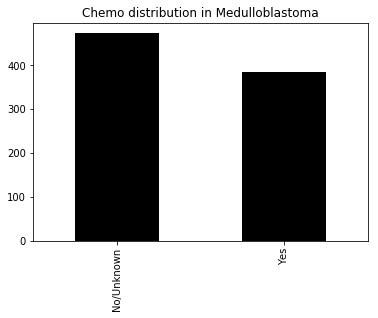

In [11]:
### Chemo distribution 
var = "Chemo"
title = "%s distribution in Medulloblastoma" %(var)
var_dist(cdf, var, "Chemotherapy recode (yes, no/unk)", title)


Radiation distribution
Radiation prior to surgery, 1.5 (13)
Sequence unknown, but both were given, 0.4 (3)
Radiation after surgery, 78.2 (670)
Intraoperative rad with other rad before/after surgery, 0.1 (1)
Radiation before and after surgery, 0.2 (2)
No radiation and/or cancer-directed surgery, 19.6 (168)


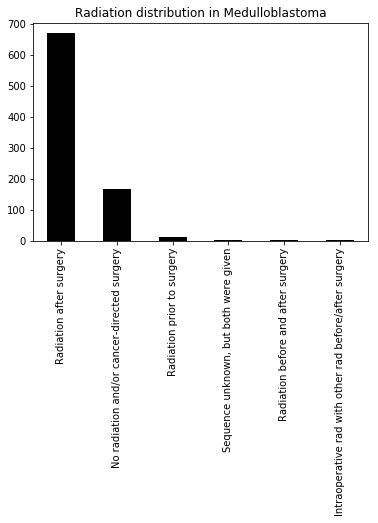

In [12]:
### Radiation distribution 

var = "Radiation"
title = "%s distribution in Medulloblastoma" %(var)
var_dist(cdf, var, "Radiation sequence with surgery", title)


Surgery distribution
Recommended but not performed, patient refused, 0.1 (1)
Surgery performed, 95.1 (815)
Not recommended, 2.0 (17)
Unknown; death certificate; or autopsy only (2003+), 0.5 (4)
Recommended but not performed, unknown reason, 2.1 (18)
Not recommended, contraindicated due to other cond; autopsy only (1973-2002), 0.2 (2)


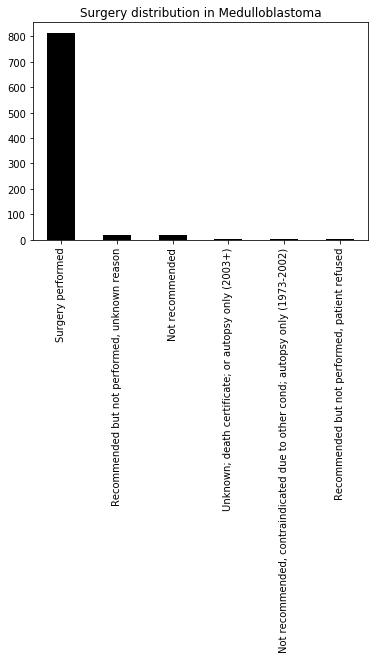

In [13]:
### Surgery Distribution

var = "Surgery"
title = "%s distribution in Medulloblastoma" %(var)
var_dist(cdf, var, "Reason no cancer-directed surgery", title)


Primary Site distribution
C70.0-Cerebral meninges, 0.1 (1)
C71.4-Occipital lobe, 0.2 (2)
C71.0-Cerebrum, 0.4 (3)
C72.0-Spinal cord, 0.1 (1)
C71.5-Ventricle, NOS, 1.8 (15)
C71.9-Brain, NOS, 2.2 (19)
C71.6-Cerebellum, NOS, 91.6 (785)
C71.8-Overlapping lesion of brain, 0.2 (2)
C71.7-Brain stem, 3.2 (27)
C71.3-Parietal lobe, 0.1 (1)
C71.1-Frontal lobe, 0.1 (1)


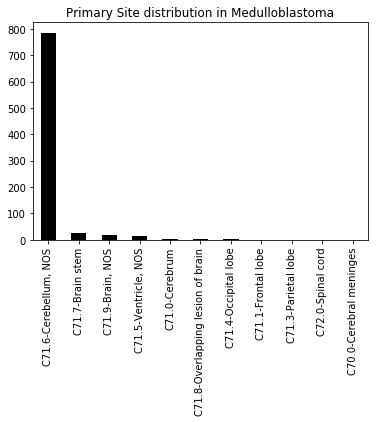

In [14]:
### Primary site distribution

var = "Primary Site"
title = "%s distribution in Medulloblastoma" %(var)
var_dist(cdf, var, "Primary Site - labeled", title)


Median survival (months): 60.0, STD: 94.3068240088
Standard deviation: 94.3068240088,  Range: 0 -- 488


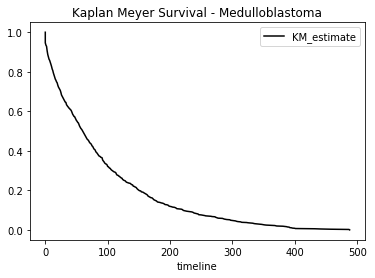

In [25]:
### Global survival analysis

# def get_numerical_survival_months(df):
#     """
#         Input: Entire dataframe
#         Output: list of int survival months
#     """
#     survival_months_df = df["Survival months"]
#     survival_months = []
#     for sm in survival_months_df:
#         if(sm.isdigit()):
#             survival_months.append(int(sm))
#     return survival_months

def global_KM_survival(df, plot_title):
    """
    Kaplan Meyer on full data set
    
    Parameters
    ----------
    df: pandas data frame 
        Dataframe object to profile
    
    plot_title: string
        Title to name the plot 
    """

    ax = plt.subplot(111)
#     survival_months = get_numerical_survival_months(df)
    survival_months = df["Survival months"]
    kmf = KaplanMeierFitter()
    kmf.fit(survival_months)
#     kmf.plot(ax=ax, ci_force_lines=True)
    kmf.survival_function_.plot(ax=ax, color="black")
    plt.title(plot_title)
    survival_months_arr = np.array(map(float,survival_months))
    survival_std = np.std(survival_months_arr)
    print("Median survival (months): %s, STD: %s" % (kmf.median_, survival_std))
    return survival_months_arr
    
title = "Kaplan Meyer Survival - Medulloblastoma"
survival_months_arr = global_KM_survival(cdf, title)
# plt.hist(survival_months_arr)


surv_months_df = cdf['Survival months'].astype(int)
std = np.std(np.array(surv_months_df))
min_surv, max_surv = min(surv_months_df), max(surv_months_df)
print("Standard deviation: %s,  Range: %s -- %s" % (std, min_surv, max_surv))

In [16]:
### Survival Analysis Stratified by variables 
from scipy.stats import ttest_ind

def pairwise_ttest(df, var):
    """
    Perform pairwise log rank tests upon a specified variable
    
    Parameters
    ----------
    df: pandas DataFrame object
    var: string
        Name of column variable
    """
    
    var_types = df[var].unique()
    var_count_dict = df[var].value_counts().to_dict()
    
    var_type_pairwise_combo = []
    for combo in itertools.combinations(var_count_dict.keys(),2):
        var_type_pairwise_combo.append(combo)

    for vt1, vt2 in var_type_pairwise_combo:
        print("\n\nPerforming t-test for var = %s, %s vs %s " % (var, vt1, vt2))
        data_slice1 = (df[var] == vt1)
        data_slice2 = (df[var] == vt2)
        test_stat, p_val = ttest_ind(data_slice1, data_slice2)
        print ("test_stat: %s    p_val: %s" % (test_stat, p_val))


def pairwise_logrank(df, var):
    """
    Perform pairwise log rank tests upon a specified variable
    
    Parameters
    ----------
    df: pandas DataFrame object
    var: string
        Name of column variable
    """
    
    var_types = df[var].unique()
    var_count_dict = df[var].value_counts().to_dict()
    
    var_type_pairwise_combo = []
    for combo in itertools.combinations(var_count_dict.keys(),2):
        var_type_pairwise_combo.append(combo)

    for vt1, vt2 in var_type_pairwise_combo:
        print("\n\nPerforming logrank significance test for var = %s, %s vs %s " % (var, vt1, vt2))
        data_slice1 = (df[var] == vt1)
        data_slice2 = (df[var] == vt2)
        results = logrank_test(data_slice1, data_slice2, alpha=0.99)
        results.print_summary()


def pairwise_KM(df, var, row, col):
    """
    Perform pairwise kaplan meyer plotting upon a specified variable
    
    Parameters
    ----------
    df: pandas DataFrame object
    var: string
        Name of column variable
    row: int
        Number of rows of kaplan meyer graphs
    col: int
        Number of cols of kaplan meyer graphs
    """
    survival_months = df["Survival months"]
    var_types = df[var].unique()
    var_count_dict = df[var].value_counts().to_dict()
    kmf = KaplanMeierFitter()
    
    for i, var_type in enumerate(var_types):
        ax = plt.subplot(row, col, i+1)
        ix = df[var] == var_type 
        kmf.fit(survival_months[ix], label=var_type)
#         kmf.plot(ax=ax, legend=False)
        kmf.survival_function_.plot(ax=ax, legend=False)
        plt.title(var_type)
        print("%s (n = %s) -- %s (months) survival" % (var_type, var_count_dict[var_type], kmf.median_))
        if i==0:
            plt.ylabel('Percentage alive in $n$ months')
    plt.tight_layout()

    

def overlay_KM(df, var, title=""):
    """
    Overlay all kaplan meyer plotting upon a specified variable
    
    Parameters
    ----------
    df: pandas DataFrame object
        Input data set 
    var: string
        Name of column variable
    """
    
    ax = plt.subplot(111)
    kmf = KaplanMeierFitter()
    var_types = df[var].unique()
    var_count_dict = df[var].value_counts().to_dict()
    
    survival_months = df['Survival months']

    for i, var_type in enumerate(var_types):
        ix = df[var] == var_type 
        kmf.fit(survival_months[ix], label=var_type)
#         kmf.plot(ax=ax)
        kmf.survival_function_.plot(ax=ax)
    plt.ylabel("Survival")
    plt.title(title)
    




Performing t-test for var = Sex, Male vs Female 
test_stat: 7.10306885843    p_val: 1.78240083892e-12


Performing logrank significance test for var = Sex, Male vs Female 

df=1, alpha=0.99, t_0=-1, null_distribution=chi squared

test_statistic      p     
       49.0379 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
Male (n = 501) -- 58.0 (months) survival
Female (n = 356) -- 64.0 (months) survival


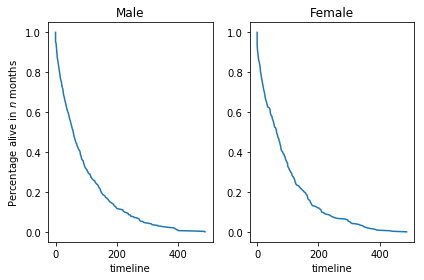

In [17]:
var= "Sex"
pairwise_ttest(cdf, var)
pairwise_logrank(cdf, var)
pairwise_KM(cdf, var, 1, 2)

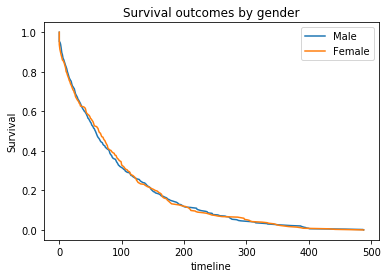

In [114]:
var= "Sex"
overlay_KM(cdf, var, "Survival outcomes by gender")



Performing t-test for var = Race recode (W, B, AI, API), Asian or Pacific Islander vs White 
test_stat: -57.9171365311    p_val: 0.0


Performing t-test for var = Race recode (W, B, AI, API), Asian or Pacific Islander vs Black 
test_stat: -1.49770969545    p_val: 0.134393035168


Performing t-test for var = Race recode (W, B, AI, API), Asian or Pacific Islander vs Unknown 
test_stat: 6.08965871123    p_val: 1.39392081772e-09


Performing t-test for var = Race recode (W, B, AI, API), Asian or Pacific Islander vs American Indian/Alaska Native 
test_stat: 5.8837149262    p_val: 4.81509462555e-09


Performing t-test for var = Race recode (W, B, AI, API), White vs Black 
test_stat: 54.2456952778    p_val: 0.0


Performing t-test for var = Race recode (W, B, AI, API), White vs Unknown 
test_stat: 72.1295712692    p_val: 0.0


Performing t-test for var = Race recode (W, B, AI, API), White vs American Indian/Alaska Native 
test_stat: 71.6923659509    p_val: 0.0


Performing t-test for var = 

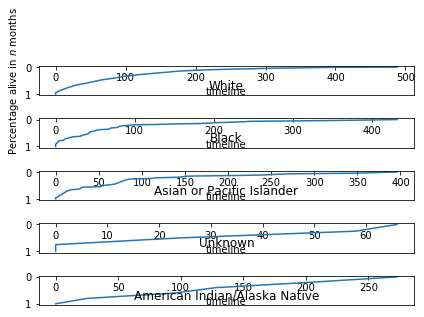

In [115]:
var = "Race recode (W, B, AI, API)"
pairwise_ttest(cdf, var)
# pairwise_logrank(cdf, var)
pairwise_KM(cdf, var, 5, 1)

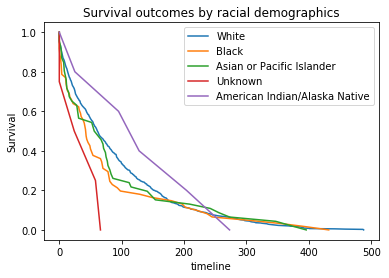

In [116]:
var= "Race recode (W, B, AI, API)"
overlay_KM(cdf, var, "Survival outcomes by racial demographics")



Performing t-test for var = Primary Site - labeled, C70.0-Cerebral meninges vs C71.4-Occipital lobe 
test_stat: -0.577575225469    p_val: 0.563626887117


Performing t-test for var = Primary Site - labeled, C70.0-Cerebral meninges vs C71.0-Cerebrum 
test_stat: -1.00087732141    p_val: 0.317027563222


Performing t-test for var = Primary Site - labeled, C70.0-Cerebral meninges vs C72.0-Spinal cord 
test_stat: 0.0    p_val: 1.0


Performing t-test for var = Primary Site - labeled, C70.0-Cerebral meninges vs C71.5-Ventricle, NOS 
test_stat: -3.52714521587    p_val: 0.000431142212209


Performing t-test for var = Primary Site - labeled, C70.0-Cerebral meninges vs C71.9-Brain, NOS 
test_stat: -4.06573709711    p_val: 5.00524048133e-05


Performing t-test for var = Primary Site - labeled, C70.0-Cerebral meninges vs C71.6-Cerebellum, NOS 
test_stat: -95.7608100343    p_val: 0.0


Performing t-test for var = Primary Site - labeled, C70.0-Cerebral meninges vs C71.8-Overlapping lesion of brain

C71.8-Overlapping lesion of brain (n = 2) -- 26.0 (months) survival
C71.7-Brain stem (n = 27) -- 46.0 (months) survival
C71.0-Cerebrum (n = 3) -- 89.0 (months) survival
C71.1-Frontal lobe (n = 1) -- 65.0 (months) survival
C72.0-Spinal cord (n = 1) -- 25.0 (months) survival
C70.0-Cerebral meninges (n = 1) -- 4.0 (months) survival


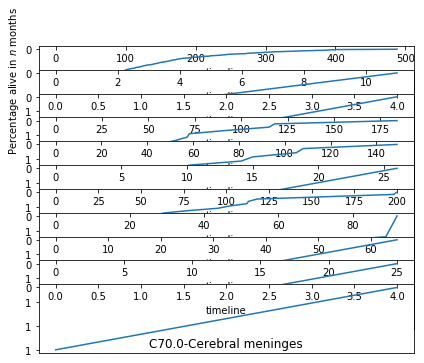

In [117]:
### Primary site - labeled

var = "Primary Site - labeled"
pairwise_ttest(cdf, var)
# pairwise_logrank(cdf, var)
pairwise_KM(cdf, var, 11, 1)

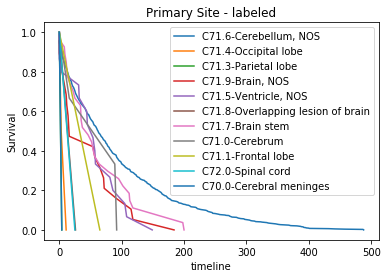

In [118]:
overlay_KM(cdf, var, "Primary Site - labeled")



Performing t-test for var = Chemotherapy recode (yes, no/unk), Yes vs No/Unknown 
test_stat: -4.32031794092    p_val: 1.64750190423e-05
No/Unknown (n = 473) -- 67.0 (months) survival
Yes (n = 384) -- 54.0 (months) survival


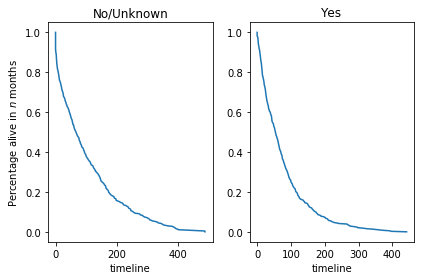

In [119]:
var = "Chemotherapy recode (yes, no/unk)"
pairwise_ttest(cdf, var)
# pairwise_logrank(cdf, var)
pairwise_KM(cdf, var, 1,2)

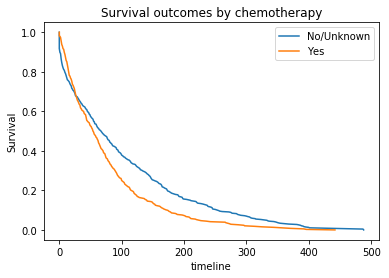

In [120]:
var= "Chemotherapy recode (yes, no/unk)"
overlay_KM(cdf, var, "Survival outcomes by chemotherapy")



Performing t-test for var = Radiation sequence with surgery, Radiation prior to surgery vs Sequence unknown, but both were given 
test_stat: 2.51491780892    p_val: 0.0119969884606


Performing t-test for var = Radiation sequence with surgery, Radiation prior to surgery vs Radiation after surgery 
test_stat: -52.0732726169    p_val: 0.0


Performing t-test for var = Radiation sequence with surgery, Radiation prior to surgery vs Intraoperative rad with other rad before/after surgery 
test_stat: 3.22821514357    p_val: 0.00126922835025


Performing t-test for var = Radiation sequence with surgery, Radiation prior to surgery vs Radiation before and after surgery 
test_stat: 2.85782540792    p_val: 0.00431712792784


Performing t-test for var = Radiation sequence with surgery, Radiation prior to surgery vs No radiation and/or cancer-directed surgery 
test_stat: -12.7391116548    p_val: 1.39861147492e-35


Performing t-test for var = Radiation sequence with surgery, Sequence unknown, but 

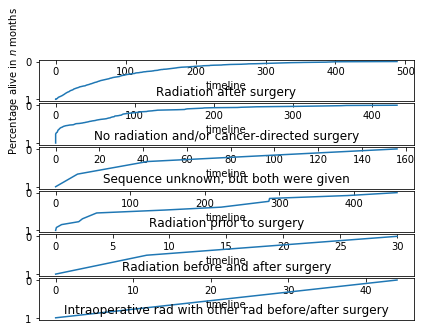

In [121]:
var = "Radiation sequence with surgery"
pairwise_ttest(cdf, var)
# pairwise_logrank(cdf, var)
pairwise_KM(cdf, var, 6, 1)

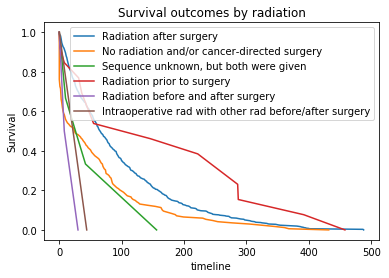

In [122]:
var = "Radiation sequence with surgery"
overlay_KM(cdf, var, "Survival outcomes by radiation")



Performing t-test for var = Reason no cancer-directed surgery, Recommended but not performed, patient refused vs Surgery performed 
test_stat: -127.14355715    p_val: 0.0


Performing t-test for var = Reason no cancer-directed surgery, Recommended but not performed, patient refused vs Not recommended 
test_stat: -3.80497060021    p_val: 0.000146807293347


Performing t-test for var = Reason no cancer-directed surgery, Recommended but not performed, patient refused vs Unknown; death certificate; or autopsy only (2003+) 
test_stat: -1.34352555557    p_val: 0.179279904176


Performing t-test for var = Reason no cancer-directed surgery, Recommended but not performed, patient refused vs Recommended but not performed, unknown reason 
test_stat: -3.93728247111    p_val: 8.57123086846e-05


Performing t-test for var = Reason no cancer-directed surgery, Recommended but not performed, patient refused vs Not recommended, contraindicated due to other cond; autopsy only (1973-2002) 
test_stat: -0

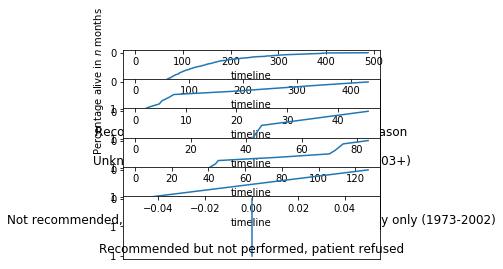

In [123]:
### Surgery influence on outcomes

var = "Reason no cancer-directed surgery"
pairwise_ttest(cdf, var)
# pairwise_logrank(cdf, var)
pairwise_KM(cdf, var, 10,1)


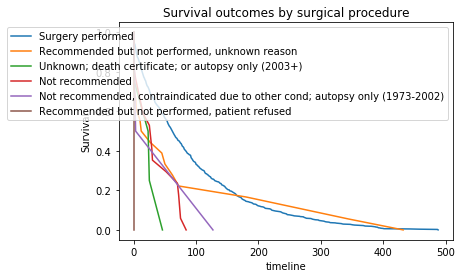

In [124]:
var = "Reason no cancer-directed surgery"
overlay_KM(cdf, var, "Survival outcomes by surgical procedure")

In [2]:
### Cox Proportional Hazard Model

# from lifelines.datasets import load_rossi
# from lifelines import CoxPHFitter
# cph = CoxPHFitter()
# cph.fit(pruned_cdf, duration_col='Survival months')
# cph.plot()